# 1.
Napisz funkcję, która obliczy współczynnik korelacji liniowej Pearsona. Nie używaj żadnych gotowych funkcji.

In [50]:
def Pearson(x,y):
    sum_x=0
    sum_y=0
    for i in x:
        sum_x+=i
    sum_x/=len(x)
    
    for i in y:
        sum_y+=i
    sum_y/=len(y)    
    numerator=0
    for i in range(len(x)):
        xx=x[i]-sum_x
        yy=y[i]-sum_y
        numerator+=xx*yy    
    x1=0
    y1=0
    for i in x:
        x1+=(i-sum_x)**2
    for i in y:
        y1+=(i-sum_y)**2
    denominator=x1**(1/2)*y1**(1/2)
    
    return numerator/denominator  

In [51]:
Pearson([1,3,4,3],[2,4,6,8])

0.7181848464596078

# 2 
Napisz funkcję, która znajdzie współczynniki prostej regresji.

In [64]:
import numpy as np

def a(x,y):
    mean_x=np.array(x).mean()
    mean_y=np.array(y).mean()
    numerator=0
    for i in range(len(x)):
        xx=x[i]-mean_x
        yy=y[i]-mean_y
        numerator+=xx*yy
    denominator=0    
    for i in range(len(x)):
        denominator+=(x[i]-mean_x)**2
    return numerator/denominator


def b(x,y):
    mean_x=np.array(x).mean()
    mean_y=np.array(y).mean()
    return mean_y-a(x,y)*mean_x

In [65]:
a([1,2],[3,4])

1.0

In [66]:
b([1,2],[3,4])

2.0

# 3
Napisz funkcję, która wyrysuje zależność  x  i  y  z kwartetu Anscombe’a ze strony https://pl.wikipedia.org/wiki/Kwartet_Anscombe%E2%80%99a. Dane pobierz automatycznie.

In [72]:
import pandas as pd
anscombe=pd.read_html('https://pl.wikipedia.org/wiki/Kwartet_Anscombe%E2%80%99a', match='Kwartet',header=[0,1])
anscombe=anscombe[0]
anscombe

In [80]:
def plot(anscombe):
    return anscombe.plot(('I', 'x'),(  'I', 'y'),kind = 'scatter')

<AxesSubplot:xlabel='(I, x)', ylabel='(I, y)'>

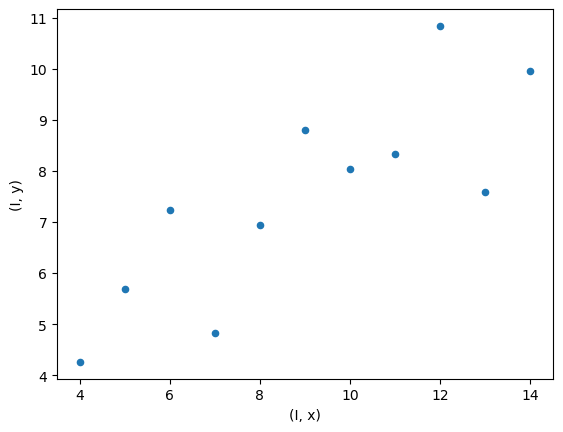

In [81]:
plot(anscombe)

# 4
Sprawdź współczynnik korelacji Pearsona.

In [83]:
Pearson(anscombe[('I', 'x')],anscombe[('I', 'y')])

0.81642051634484

# 5
Do danych z punktu 3 zastosuj bibliotekę statsmodels i seaborn w celu uzyskania modelu prostej regresji i odpowiednich wykresów.

In [97]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

dane=pd.DataFrame([anscombe[('I', 'x')],anscombe[('I', 'y')]],index=['x','y'])
dane=dane.T

mod = smf.ols(formula='y ~ x', data=dane)
res = mod.fit()

print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Tue, 10 Jan 2023   Prob (F-statistic):            0.00217
Time:                        18:52:47   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0001      1.125      2.667      0.0

C:\Users\olaki\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Dopasowanie danych do modelu wynosi 0.667.\
y=3.0001+0.5001*x

<AxesSubplot:xlabel='x', ylabel='y'>

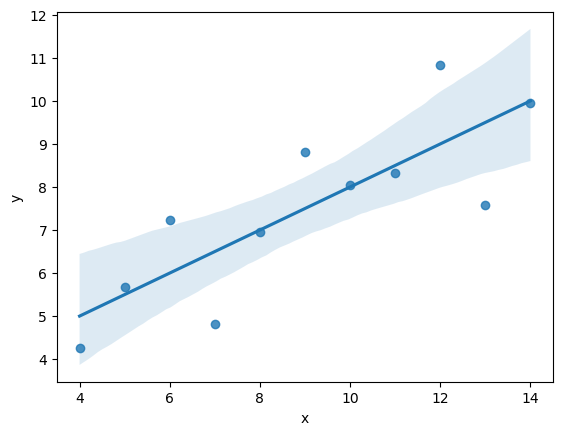

In [96]:
import seaborn as sns

sns.regplot(x=dane['x'],y=dane['y'],fit_reg=True)